**Data Analysis and Visualization**

In this section, the results obtained in "model_run" will be analyzed and visualized.

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Upload Necessary Data**

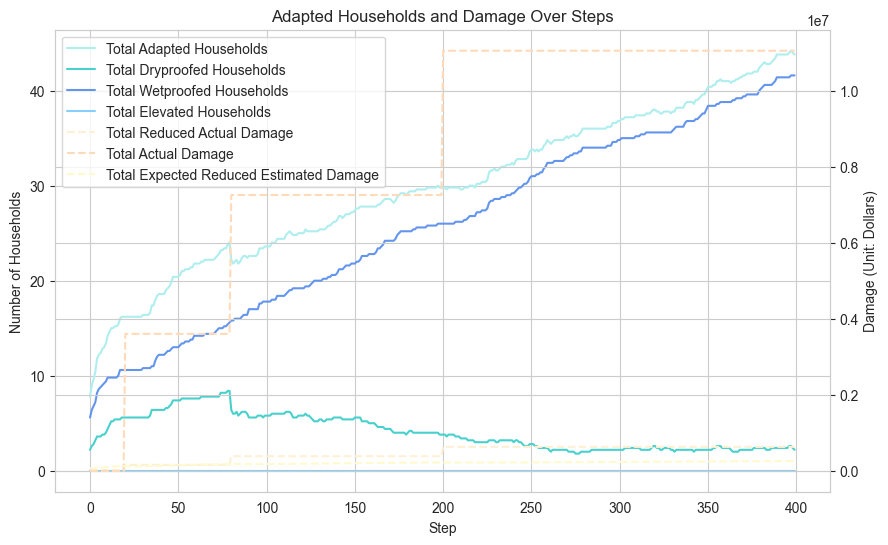

In [13]:
model_dataframe_initial = pd.read_csv(f"../result_extremevalue/{'model_results_initial'}.csv")

# Assuming you already have the grouped_data DataFrame from previous code
grouped_data = model_dataframe_initial.groupby('Step').agg('mean').reset_index()
# Define warm and cold colors
warm_colors = ['PapayaWhip', 'PeachPuff', 'LemonChiffon']
cold_colors = ['PaleTurquoise', 'MediumTurquoise', 'CornflowerBlue', 'LightSkyBlue']

# Create the line chart with dual Y-axes and custom colors
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Lines on the left Y-axis (number of households) with cold colors
ax1.plot(grouped_data['Step'], grouped_data['total_adapted_households'], label='Total Adapted Households', linestyle='-', color=cold_colors[0])
ax1.plot(grouped_data['Step'], grouped_data['total_dryproofed_households'], label='Total Dryproofed Households', linestyle='-', color=cold_colors[1])
ax1.plot(grouped_data['Step'], grouped_data['total_wetproofed_households'], label='Total Wetproofed Households', linestyle='-', color=cold_colors[2])
ax1.plot(grouped_data['Step'], grouped_data['total_elevated_households'], label='Total Elevated Households', linestyle='-', color=cold_colors[3])

# Lines on the right Y-axis (in dollars) with warm colors
ax2.plot(grouped_data['Step'], grouped_data['total_reduced_actual_damage'], label='Total Reduced Actual Damage', linestyle='--', color=warm_colors[0])
ax2.plot(grouped_data['Step'], grouped_data['total_actual_damage'], label='Total Actual Damage', linestyle='--', color=warm_colors[1])
ax2.plot(grouped_data['Step'], grouped_data['total_expected_reduced_estimated_damage'], label='Total Expected Reduced Estimated Damage', linestyle='--', color=warm_colors[2])

# Add labels and title
ax1.set_xlabel('Step')
ax1.set_ylabel('Number of Households')
ax2.set_ylabel('Damage (Unit: Dollars)')
plt.title('Adapted Households and Damage Over Steps')

# Show the legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
plt.legend(lines, labels)

# Show the grid
ax1.grid(True)

# Display the chart
plt.show()

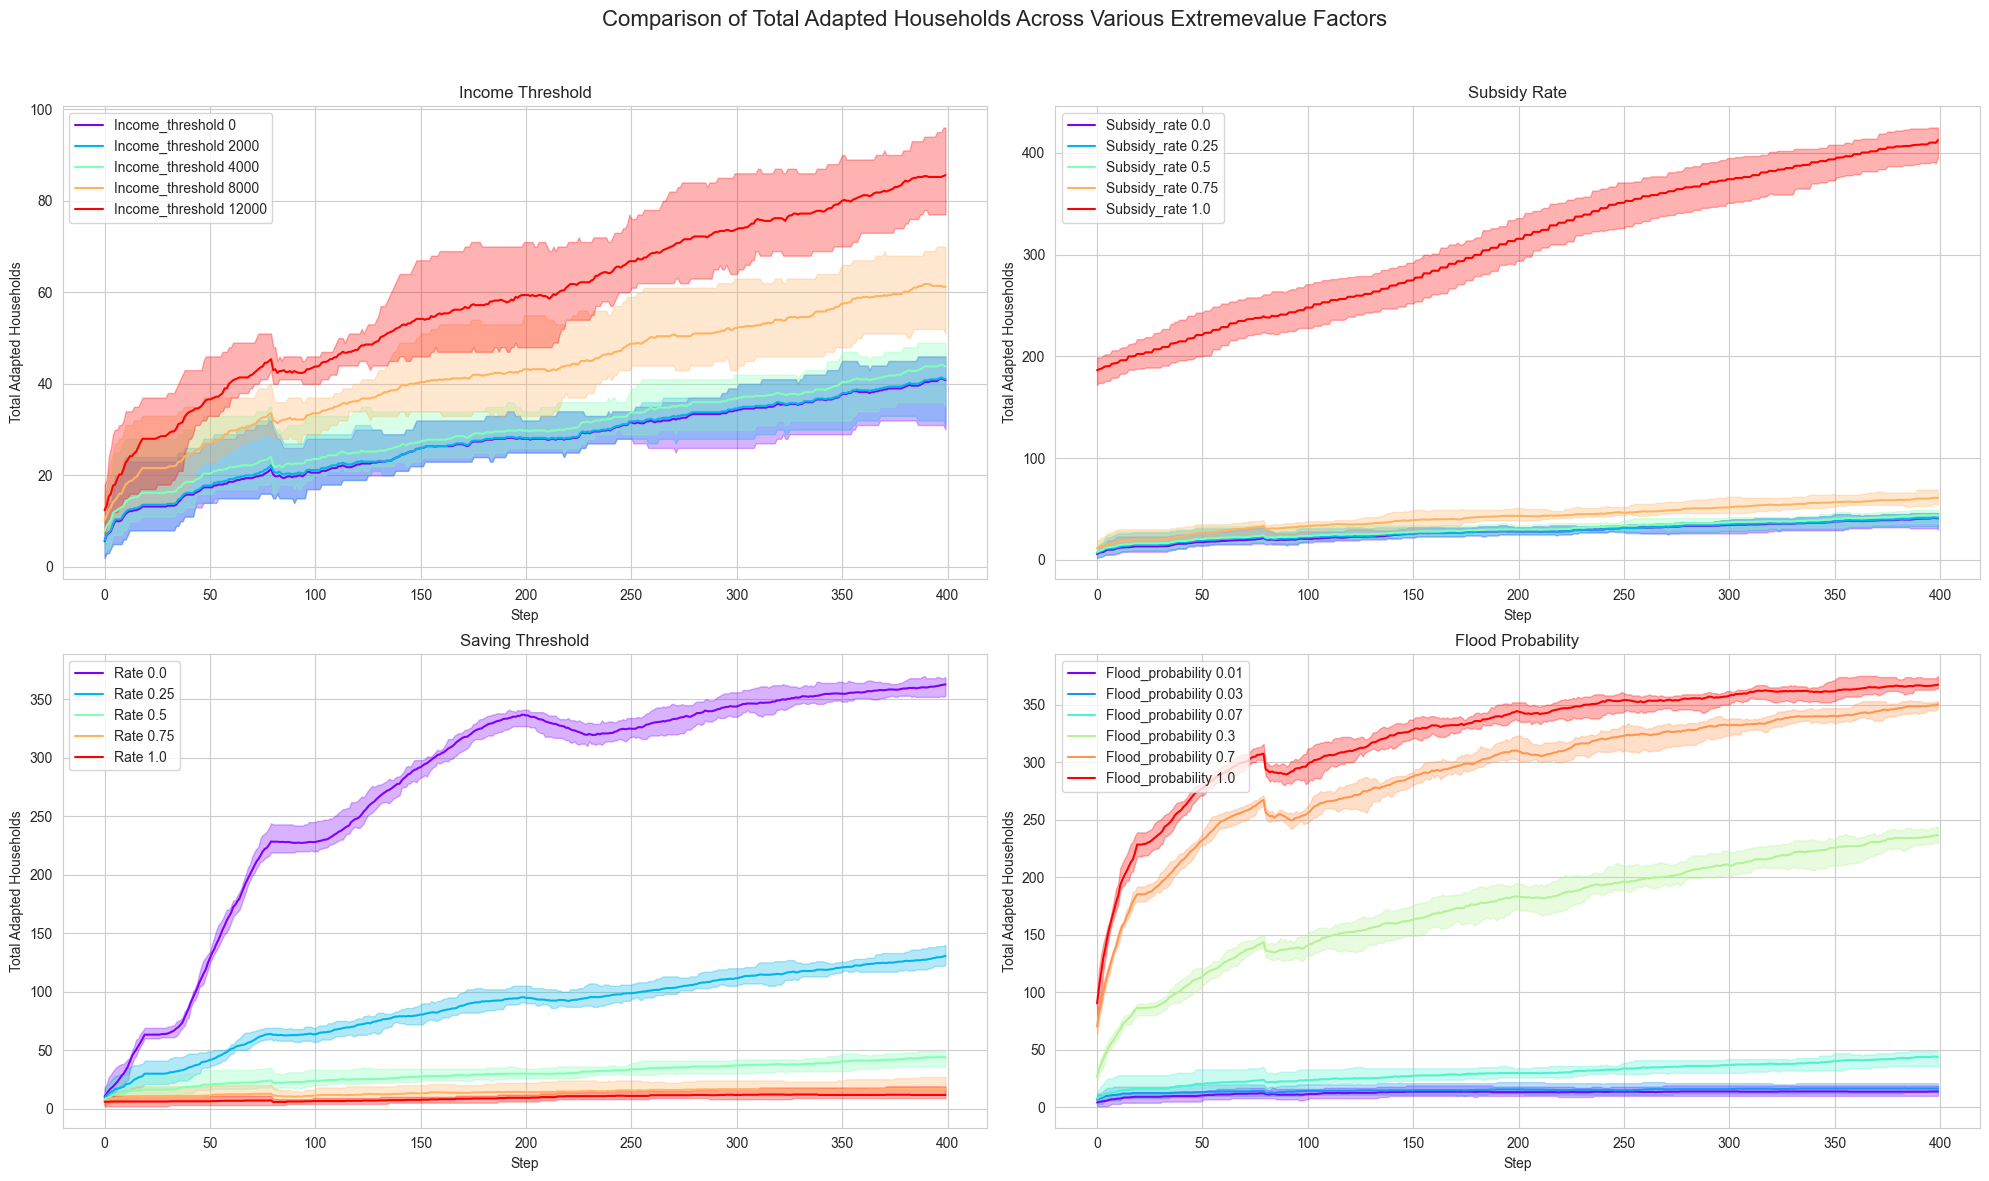

In [11]:

def group_data(df, group_column):
    return df.groupby(['Step', group_column])['total_adapted_households'].agg(['mean', 'min', 'max']).reset_index()

def plot_data(grouped, group_column, ax, title):
    unique_values = grouped[group_column].unique()
    color_map = plt.cm.rainbow(np.linspace(0, 1, len(unique_values)))

    for value, color in zip(unique_values, color_map):
        subset = grouped[grouped[group_column] == value]
        ax.plot(subset['Step'], subset['mean'], label=f'{group_column.capitalize()} {value}', color=color)
        ax.fill_between(subset['Step'], subset['min'], subset['max'], alpha=0.3, color=color)

    ax.set_xlabel('Step')
    ax.set_ylabel('Total Adapted Households')
    ax.set_title(title)
    ax.legend()

# Read dataframes
model_dataframe_income_threshold = pd.read_csv("../result_extremevalue/model_sensitivity_results_income_threshold.csv")
model_dataframe_subsidy_rate = pd.read_csv("../result_extremevalue/model_sensitivity_results_subsidy_rate.csv")
model_dataframe_saving_threshold = pd.read_csv("../result_extremevalue/model_sensitivity_results_saving_threshold.csv")
model_dataframe_flood_prob = pd.read_csv("../result_extremevalue/model_sensitivity_results_flood_prob.csv")

# Group data
grouped_income = group_data(model_dataframe_income_threshold, 'income_threshold')
grouped_subsidy = group_data(model_dataframe_subsidy_rate, 'subsidy_rate')
grouped_saving = group_data(model_dataframe_saving_threshold, 'rate')
grouped_flood = group_data(model_dataframe_flood_prob, 'flood_probability')

# Create figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 12)) # Adjust the number of rows and columns as needed

# Plot data
plot_data(grouped_income, 'income_threshold', axs[0, 0], 'Income Threshold')
plot_data(grouped_subsidy, 'subsidy_rate', axs[0, 1], 'Subsidy Rate')
plot_data(grouped_saving, 'rate', axs[1, 0], 'Saving Threshold')
plot_data(grouped_flood, 'flood_probability', axs[1, 1], 'Flood Probability')

# Set the title for the entire figure
fig.suptitle('Comparison of Total Adapted Households Across Various Extremevalue Factors', fontsize=16)

plt.tight_layout()
fig.subplots_adjust(top=0.9) # Adjust the top spacing to accommodate the figure title
plt.show()


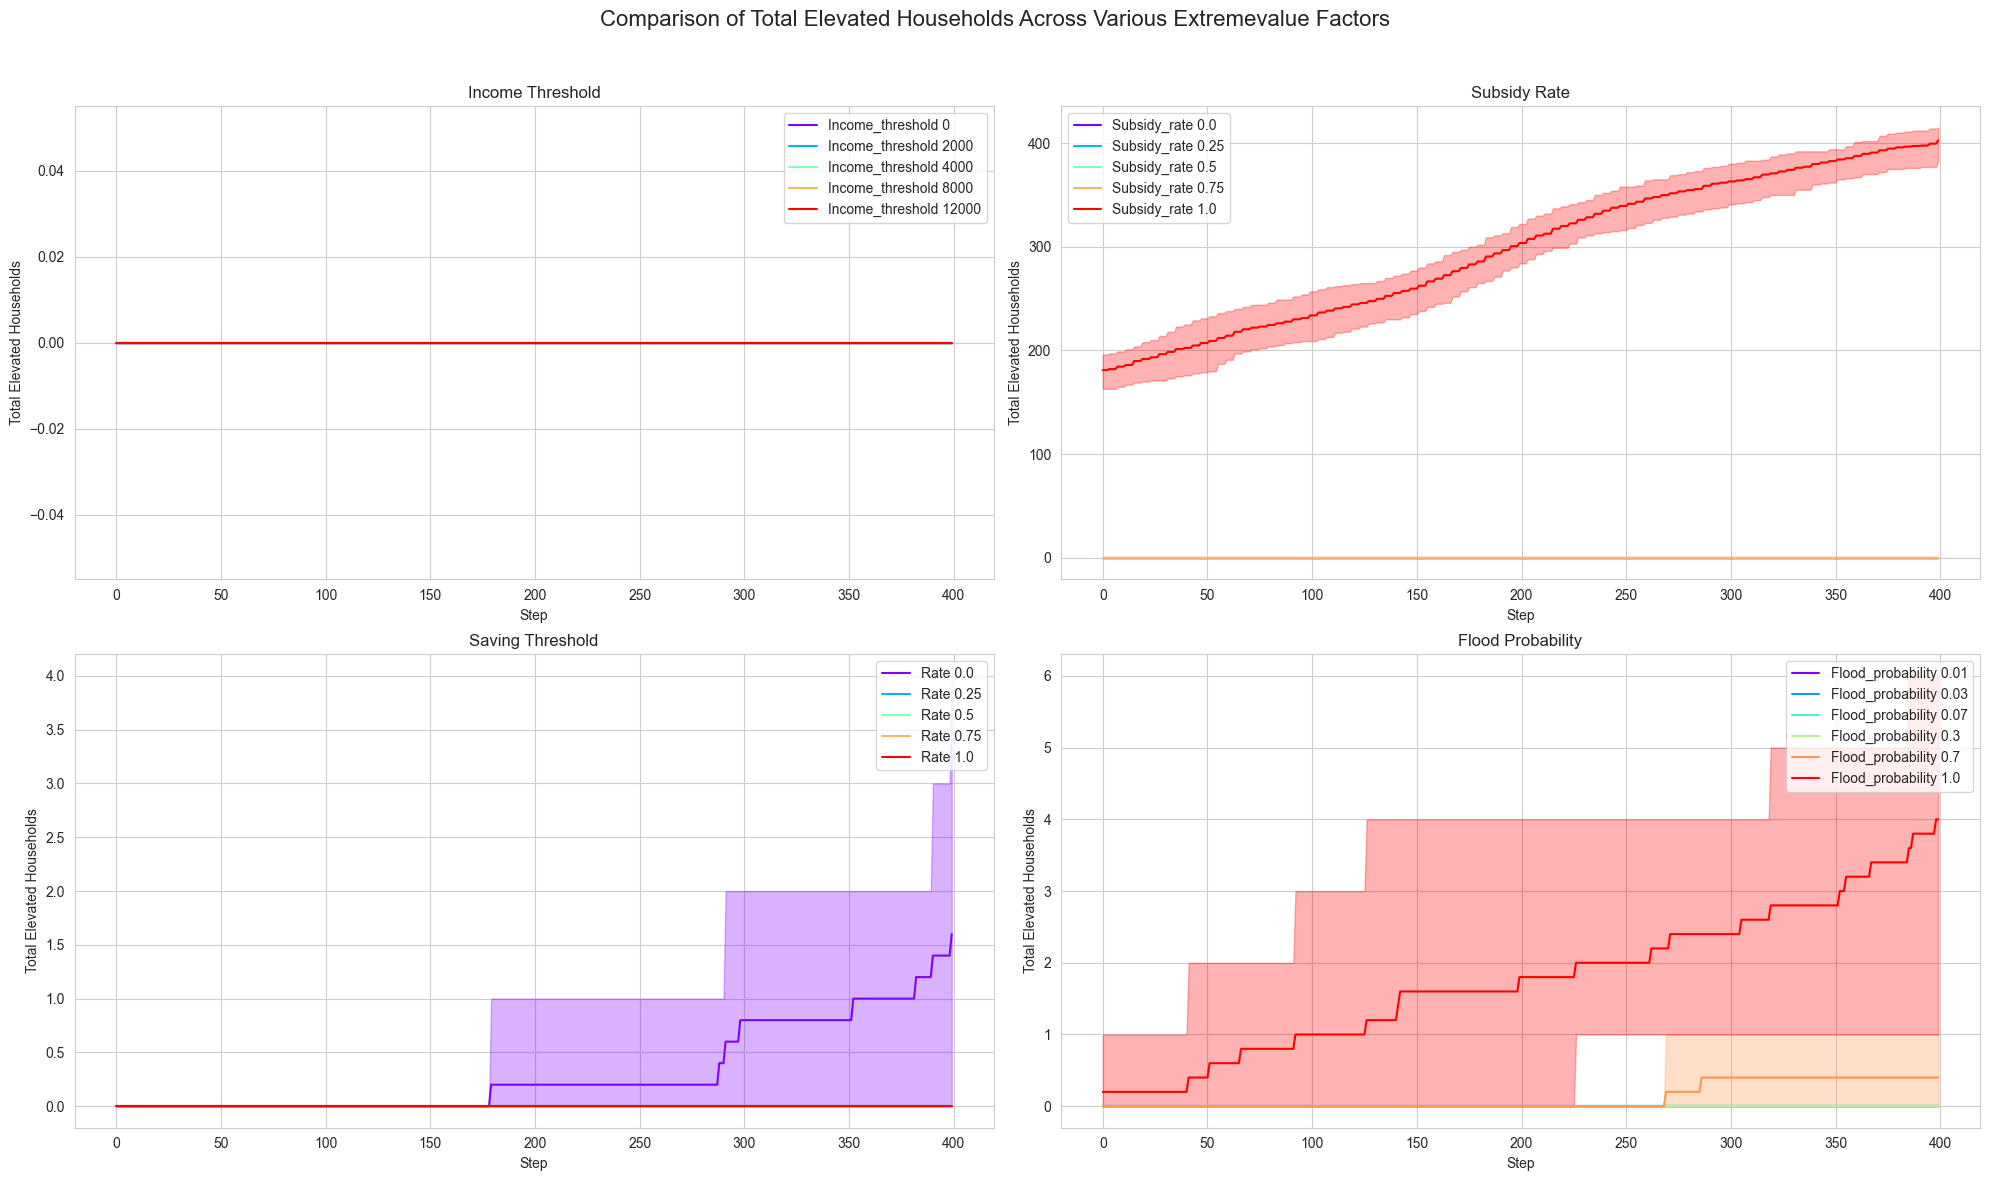

In [10]:

def group_data(df, group_column):
    return df.groupby(['Step', group_column])['total_elevated_households'].agg(['mean', 'min', 'max']).reset_index()

def plot_data(grouped, group_column, ax, title):
    unique_values = grouped[group_column].unique()
    color_map = plt.cm.rainbow(np.linspace(0, 1, len(unique_values)))

    for value, color in zip(unique_values, color_map):
        subset = grouped[grouped[group_column] == value]
        ax.plot(subset['Step'], subset['mean'], label=f'{group_column.capitalize()} {value}', color=color)
        ax.fill_between(subset['Step'], subset['min'], subset['max'], alpha=0.3, color=color)

    ax.set_xlabel('Step')
    ax.set_ylabel('Total Elevated Households')
    ax.set_title(title)
    ax.legend()

# Read dataframes
model_dataframe_income_threshold = pd.read_csv("../result_extremevalue/model_sensitivity_results_income_threshold.csv")
model_dataframe_subsidy_rate = pd.read_csv("../result_extremevalue/model_sensitivity_results_subsidy_rate.csv")
model_dataframe_saving_threshold = pd.read_csv("../result_extremevalue/model_sensitivity_results_saving_threshold.csv")
model_dataframe_flood_prob = pd.read_csv("../result_extremevalue/model_sensitivity_results_flood_prob.csv")

# Group data
grouped_income = group_data(model_dataframe_income_threshold, 'income_threshold')
grouped_subsidy = group_data(model_dataframe_subsidy_rate, 'subsidy_rate')
grouped_saving = group_data(model_dataframe_saving_threshold, 'rate')
grouped_flood = group_data(model_dataframe_flood_prob, 'flood_probability')

# Create figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 12)) # Adjust the number of rows and columns as needed

# Plot data
plot_data(grouped_income, 'income_threshold', axs[0, 0], 'Income Threshold')
plot_data(grouped_subsidy, 'subsidy_rate', axs[0, 1], 'Subsidy Rate')
plot_data(grouped_saving, 'rate', axs[1, 0], 'Saving Threshold')
plot_data(grouped_flood, 'flood_probability', axs[1, 1], 'Flood Probability')

# Set the title for the entire figure
fig.suptitle('Comparison of Total Elevated Households Across Various Extremevalue Factors', fontsize=16)

plt.tight_layout()
fig.subplots_adjust(top=0.9) # Adjust the top spacing to accommodate the figure title
plt.show()